# Boehringer Ingelheim Group 1 MVP


# Introduction 

This Jupyter notebook acts as the MVP for the COMP3850 Computing Industry Project and we will include any code or research done in here.


## Research

Due to the nature of the project, we will be exploring using python code to try determine some business insights for BI with their given sales data.

We will conduct research into potential models that could be used in data science industry for projection models.

# Aims

**MAIN GOALS :**

**Where should Boehringer Ingelheim focus their sales efforts to.**

From the main goal, we can break it into smaller components.

**SUB-GOALS :**

1) Which business unit has been performing so far ( Can be done graphically )

2) Modelling to be done for predicted level of sales


# Our Approach

To answer our hypothesis, we are using the following approach.

1) Data preparation: load and transform the data as preparation for the analysis

2) Answering sub-hypothesis 1 through exploration and visualtisation of the dataset

3) Answering sub-hypothesis 2 through creating models in order to try to predict sales levels

# Packages

In [1]:
import seaborn as sns
import pandas as pd 
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy import stats
from scipy.stats import pearsonr
from numpy.polynomial.polynomial import polyfit
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from matplotlib.pyplot import imread
from sklearn import preprocessing


import pmdarima
import datetime
#To remove the red box errors just to make the notebook look neater
import warnings
warnings.filterwarnings("ignore")

# 1. Dataset and Dataframe Manipulation

## 1.1. Sales Data

We have combined and cleaned the data from excel and are going to load the current data set as of April 6th into various DataFrames.

We will conduct our exploration and analysis on this dataset

**Data Cleaning and Manipulation**

In [2]:
# Import the Distribution/Sales Data into Jupyter
eastern = pd.read_csv("Data Extract/CSV/EASTERN-DATA-COMBINED.csv")
western = pd.read_csv("Data Extract/CSV/WESTERN-COMBINED-DATA.csv")
combined = pd.read_csv("Data Extract/CSV/RENAME-CONSOLIDATED-DATA-COMBINED.csv") 
market = pd.read_csv("Data Extract/CSV/PACE students - market data (confidential).csv")
wholesaler_to_retail = pd.read_csv("Data Extract/CSV/PACE students - wholesaler to retail.csv",encoding='cp1252')

In [3]:
wholesaler_to_retail.columns

Index(['Year', 'Month', 'Distributors Name', 'CUSTOMER ID', 'Postcode',
       'WHS_SKU_ID', 'Suppliercode', 'Product', 'Quantity', 'Price'],
      dtype='object')

In [4]:
txt = " 'VENDOR','SHIPDATE','ORDERKEY','CONSIGNEEKEY','C_COMPANY','C_ZIP','EXTERNORDERKEY','SKU','ORIGINALQTY','SHIPPEDQTY' "
print(txt.lower())

 'vendor','shipdate','orderkey','consigneekey','c_company','c_zip','externorderkey','sku','originalqty','shippedqty' 


**Aggregating data**

Market Data

In [5]:
market_drop = market.drop(['CalYr','MAT', 'YTD',
       'Brand', 'Product', 'ProductCode',
       'ProductionCompanion', 'Region', 'Units', 'Units ADJ', 'Doses',
       'Manufacturer ADJ', 'Brand ADJ', 'Product ADJ',
       'SubCategory3.1', 'Species ADJ', 'Doses ADJ',
       'Doses / Unit', 'Monthly Doses',
       'BI Market Only FLG'],axis = 1).dropna()

In [6]:
market_drop

,Period,Qtr,Manufacturer,SubCategory2,SubCategory3,Species,Value,YEAR,BI Business Unit
0,2020-10,Dec-20,Elanco,Parasites - External,Cattle Tick & Worm Pour-On,Cattle,103385.00,2020,Cattle & Sheep
1,2020-10,Dec-20,Elanco,Parasites - External,Cattle Tick & Worm Pour-On,Cattle,95091.00,2020,Cattle & Sheep
2,2020-11,Dec-20,Elanco,Parasites - External,Cattle Tick & Worm Pour-On,Cattle,29946.00,2020,Cattle & Sheep
3,2020-11,Dec-20,Elanco,Parasites - External,Cattle Tick & Worm Pour-On,Cattle,200.00,2020,Cattle & Sheep
4,2020-11,Dec-20,Elanco,Parasites - External,Cattle Tick & Worm Pour-On,Cattle,32790.00,2020,Cattle & Sheep
...,...,...,...,...,...,...,...,...,...
199394,2018-03,Mar-18,Vetoquinol,Nutrition & Metabolism,Vitamin & Mineral - Oral,Cat & Dog,3273.14,2018,Pets
199395,2018-03,Mar-18,Vetoquinol,Nutrition & Metabolism,Vitamin & Mineral - Oral,Cat & Dog,1435.84,2018,Pets
199396,2018-03,Mar-18,Vetoquinol,Nutrition & Metabolism,Vitamin & Mineral - Oral,Cat & Dog,3130.32,2018,Pets
199397,2018-03,Mar-18,Vetoquinol,Nutrition & Metabolism,Vitamin & Mineral - Oral,Cat & Dog,1341.17,2018,Pets


In [7]:
market_drop.columns

Index(['Period', 'Qtr', 'Manufacturer', 'SubCategory2', 'SubCategory3',
       'Species', 'Value', 'YEAR', 'BI Business Unit'],
      dtype='object')

In [8]:
# Merge data to Period with Units sold
market_drop_unit = market_drop.groupby(['Period','Qtr', 'Manufacturer', 'SubCategory2', 'SubCategory3', 'Species',
       'YEAR', 'BI Business Unit']).sum().reset_index()
market_drop_unit

,Period,Qtr,Manufacturer,SubCategory2,SubCategory3,Species,YEAR,BI Business Unit,Value
0,2018-01,Mar-18,Bayer,Alimentary System,Antidiarrhoeals,Cattle & Cat & Dog & Horse,2018,No Bus,25510.00
1,2018-01,Mar-18,Bayer,Anaesthetics,Anaesthetics Local & General,Cattle & Sheep,2018,Cattle & Sheep,74344.00
2,2018-01,Mar-18,Bayer,Anaesthetics,Anaesthetics Local & General,Sheep,2018,Cattle & Sheep,2120.00
3,2018-01,Mar-18,Bayer,Antibiotics,Antibiotics Oral - Companion,Cat,2018,Pets,1050.00
4,2018-01,Mar-18,Bayer,Antibiotics,Antibiotics Oral - Companion,Cat & Dog,2018,Pets,31783.45
...,...,...,...,...,...,...,...,...,...
15859,2020-12,Dec-20,Zoetis,Vaccines & Antisera,Vaccines Other,Other,2020,No Bus,241116.48
15860,2020-12,Dec-20,Zoetis,Vaccines & Antisera,Vaccines Pig,Pig,2020,Swine,1290803.56
15861,2020-12,Dec-20,Zoetis,Vaccines & Antisera,"Vaccines Sheep, Goat, Cattle",Cattle,2020,Cattle & Sheep,4156440.92
15862,2020-12,Dec-20,Zoetis,Vaccines & Antisera,"Vaccines Sheep, Goat, Cattle",Pig,2020,Swine,508284.39


In [9]:
market_drop_unit.columns

Index(['Period', 'Qtr', 'Manufacturer', 'SubCategory2', 'SubCategory3',
       'Species', 'YEAR', 'BI Business Unit', 'Value'],
      dtype='object')

Wholesaler to Retail

In [10]:
wholesaler_to_retail.head()

,Year,Month,Distributors Name,CUSTOMER ID,Postcode,WHS_SKU_ID,Suppliercode,Product,Quantity,Price
0,2020.0,June,Eastern Distributors,AU924404,3079,WSLDB3,CA472075WAL,SENTINEL LARGE DOG 22 - 45KG BLUE 3 CHEWS,6.0,56.401100
1,2020.0,June,Eastern Distributors,AU924404,3079,WSLDB6,CA472083WALZ1,SENTINEL LARGE DOG 22 - 45KG BLUE 6 CHEWS,2.0,99.507053
2,2020.0,June,Eastern Distributors,AU924404,3079,WSMDY6,CA472583WALZ1,SENTINEL MEDIUM DOG 11 - 22KG YELLOW 6 CHEWS,3.0,91.334903
3,2020.0,June,Eastern Distributors,AU924404,3079,WSSDG6,CA473083WAL,SENTINEL SMALL DOG 4 - 11KG GREEN 6 CHEWS,6.0,84.136057
4,2020.0,June,Eastern Distributors,AU924404,3079,WACS6,04506700,ADVANTAGE CAT 0-4KG SMALL 6'S ORANGE,1.0,50.102048


In [11]:
wholesaler_to_retail.columns

Index(['Year', 'Month', 'Distributors Name', 'CUSTOMER ID', 'Postcode',
       'WHS_SKU_ID', 'Suppliercode', 'Product', 'Quantity', 'Price'],
      dtype='object')

In [12]:
wholesaler_to_retail_drop = wholesaler_to_retail.drop(['WHS_SKU_ID', 'Suppliercode', 'Product'],axis =1)
wholesaler_to_retail_drop = wholesaler_to_retail_drop.dropna()
wholesaler_to_retail_drop

,Year,Month,Distributors Name,CUSTOMER ID,Postcode,Quantity,Price
0,2020.0,June,Eastern Distributors,AU924404,3079,6.0,56.401100
1,2020.0,June,Eastern Distributors,AU924404,3079,2.0,99.507053
2,2020.0,June,Eastern Distributors,AU924404,3079,3.0,91.334903
3,2020.0,June,Eastern Distributors,AU924404,3079,6.0,84.136057
4,2020.0,June,Eastern Distributors,AU924404,3079,1.0,50.102048
...,...,...,...,...,...,...,...
144505,2020.0,May,Western Distributors,AU923112,3840,12.0,10.600000
144511,2020.0,May,Western Distributors,In Google,2756,6.0,69.360000
144512,2020.0,May,Western Distributors,In Google,2756,6.0,69.360000
144513,2020.0,May,Western Distributors,In Google,2756,5.0,69.360000


# 2. Data Visualisation / Exploration

According to For Dummies, a correlation coefficient can be interpreted this way:

A positive (uphill) relationship: the variables move together.

Exactly 1 is a perfect relationship
Between 0.70 and 1 is a strong relationship
Between 0.50 and 0.70 is a moderate relationship
Between 0.30 and 0.50 is a weak relationship
A negative (downhill) relationship: the variables move opposite to each other.

Exactly -1 is a perfect relationship
Between -0.70 and -1 is a strong relationship
Between -0.50 and -0.70 is a moderate relationship
Between -0.30 and -0.50 is a weak relationship
A correlation score between -0.30 and +0.30 shows no relationship.

### 2.1. Business Units

<AxesSubplot:xlabel='Period'>

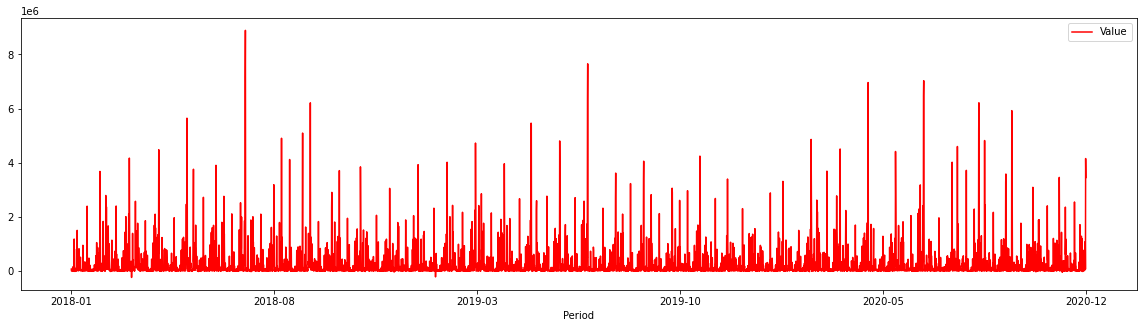

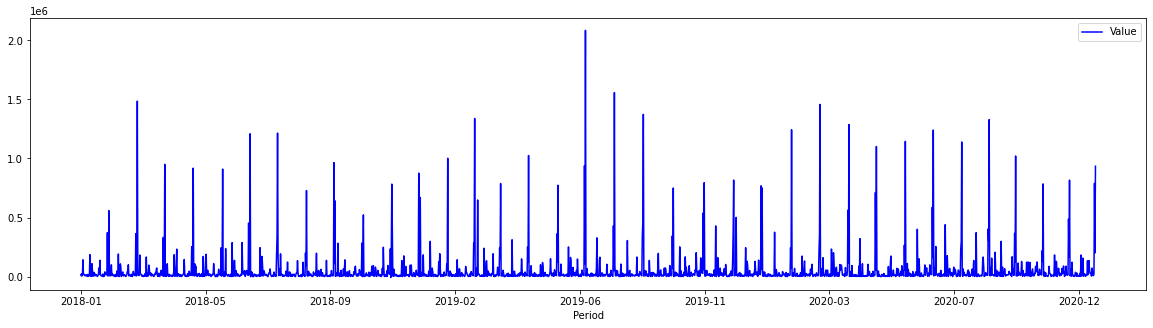

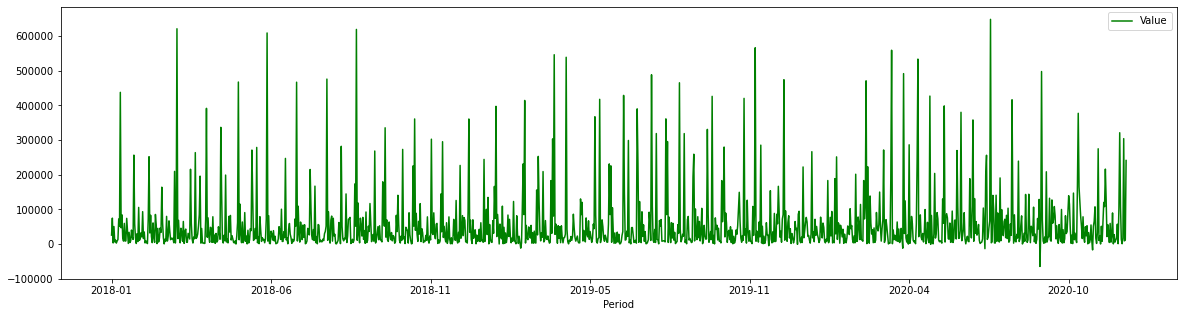

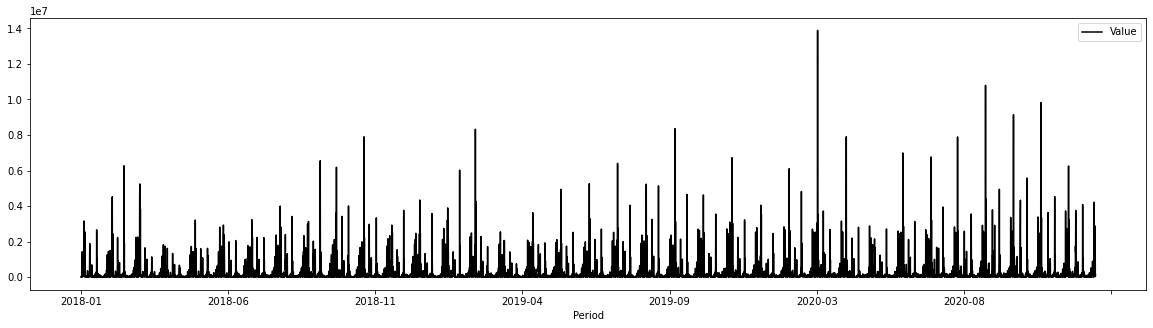

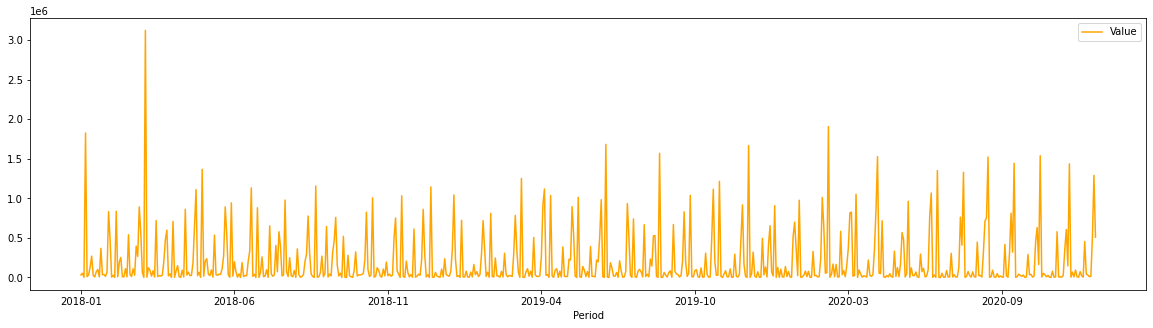

In [14]:
market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Cattle & Sheep'].plot(x='Period',y='Value',figsize=(20,5),c = "red")
market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Equine'].plot(x='Period',y='Value',figsize=(20,5),c = "blue")
market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'No Bus'].plot(x='Period',y='Value',figsize=(20,5),c = "green")
market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Pets'].plot(x='Period',y='Value',figsize=(20,5),c = "black")
market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Swine'].plot(x='Period',y='Value',figsize=(20,5),c = "orange")

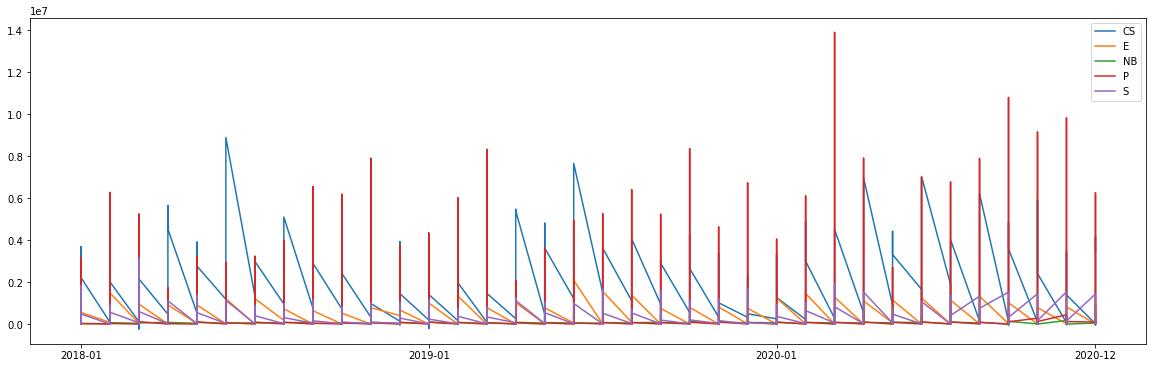

In [15]:
x1 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Cattle & Sheep']['Period']
y1 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Cattle & Sheep']['Value']
x2 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Equine']['Period']
y2 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Equine']['Value']
x3 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'No Bus']['Period']
y3 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'No Bus']['Value']
x4 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Pets']['Period']
y4 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Pets']['Value']
x5 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Swine']['Period']
y5 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Swine']['Value']
x_tick = ['2018-01', '2019-01', '2020-01', '2020-12']
plt.figure(figsize=(20, 6))
plt.plot(x1, y1,label ="CS")
plt.plot(x2, y2,label ="E")
plt.plot(x3, y3,label ="NB")
plt.plot(x4, y4,label ="P")
plt.plot(x5, y5,label ="S")
plt.xticks(x_tick)

plt.legend()

From the combined sales graph, we can observe that Pets are overwhelmingly larger in terms of sales of products. However, we need to also understand that this plot does not have the distinction between products and their associated usage. But let's observe the trends in the sales for the other units except pets

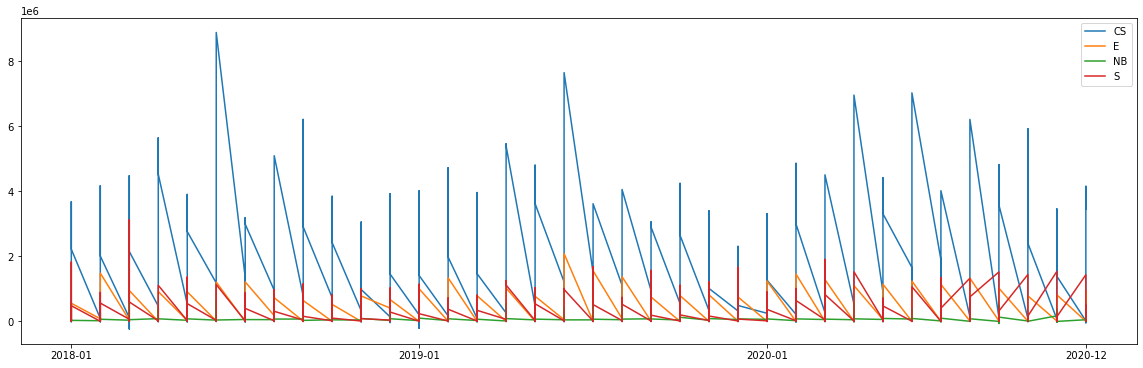

In [16]:
x1 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Cattle & Sheep']['Period']
y1 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Cattle & Sheep']['Value']
x2 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Equine']['Period']
y2 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Equine']['Value']
x3 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'No Bus']['Period']
y3 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'No Bus']['Value']
x5 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Swine']['Period']
y5 = market_drop_unit.loc[market_drop_unit['BI Business Unit'] == 'Swine']['Value']
x_tick = ['2018-01', '2019-01', '2020-01', '2020-12']
plt.figure(figsize=(20, 6))
plt.plot(x1, y1,label ="CS")
plt.plot(x2, y2,label ="E")
plt.plot(x3, y3,label ="NB")
plt.plot(x5, y5,label ="S")
plt.xticks(x_tick)

plt.legend()

### Scatterplot Matrix

# 3. Modelling

### 3.1. Based on Market Data, predictions on future sales

#### Use Linear Regression to find the most "impactful" variable to units sold

# MISSING ASSUMPTION TESTING
- Heteroskedasticity
- Normality Assumption
- Independance of variables (Period, Qtr and CalYr have strong relation)

Convert Categorical Strings into float variables

In [13]:
market_drop.columns

Index(['Period', 'Qtr', 'Manufacturer', 'SubCategory2', 'SubCategory3',
       'Species', 'Value', 'YEAR', 'BI Business Unit'],
      dtype='object')

In [14]:
Period = market_drop['Period']
Period_Unique = Period.unique()

Qtr = market_drop['Qtr']
Qtr_Unique = Qtr.unique()
Qtr_Unique = np.flip(Qtr_Unique)

Manufacturer = market_drop['Manufacturer']
Manufacturer_Unique = Manufacturer.unique()

SubCategory2 = market_drop['SubCategory2']
SubCategory2_Unique = SubCategory2.unique()

SubCategory3 = market_drop['SubCategory3']
SubCategory3_Unique = SubCategory3.unique()

Species = market_drop['Species']
Species_Unique = Species.unique()

BI_Business_Unit = market_drop['BI Business Unit']
BI_Business_Unit_Unique = BI_Business_Unit.unique()

In [15]:
le = preprocessing.LabelEncoder()

le.fit(Period_Unique)
arr1 = le.transform(Period)

le.fit(Qtr_Unique)
arr2 = le.transform(Qtr)

le.fit(Manufacturer_Unique)
arr3 = le.transform(Manufacturer)

le.fit(SubCategory2_Unique)
arr4 = le.transform(SubCategory2)

le.fit(SubCategory3_Unique)
arr5 = le.transform(SubCategory3)

le.fit(Species_Unique)
arr6 = le.transform(Species)

le.fit(BI_Business_Unit_Unique)
arr7 = le.transform(BI_Business_Unit)

In [16]:
market_drop_model = pd.DataFrame({'Period':arr1,'Qtr':arr2, 'Manufacturer':arr3, 'SubCategory2':arr4,'SubCategory3':arr5,'Species':arr6,'BI Business Unit':arr7,'Year':market_drop['YEAR'],'Value':market_drop['Value'].astype(int)})

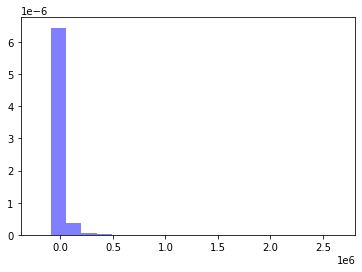

Index(['Period', 'Qtr', 'Manufacturer', 'SubCategory2', 'SubCategory3',
       'Species', 'BI Business Unit', 'Year', 'Value'],
      dtype='object')

In [21]:
plt.hist(market_drop_model.Value, 20,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.show()
market_drop_model.columns

In [22]:


market_drop_model.Value

0         103385
1          95091
2          29946
3            200
4          32790
           ...  
199394      3273
199395      1435
199396      3130
199397      1341
199398      1037
Name: Value, Length: 199091, dtype: int32

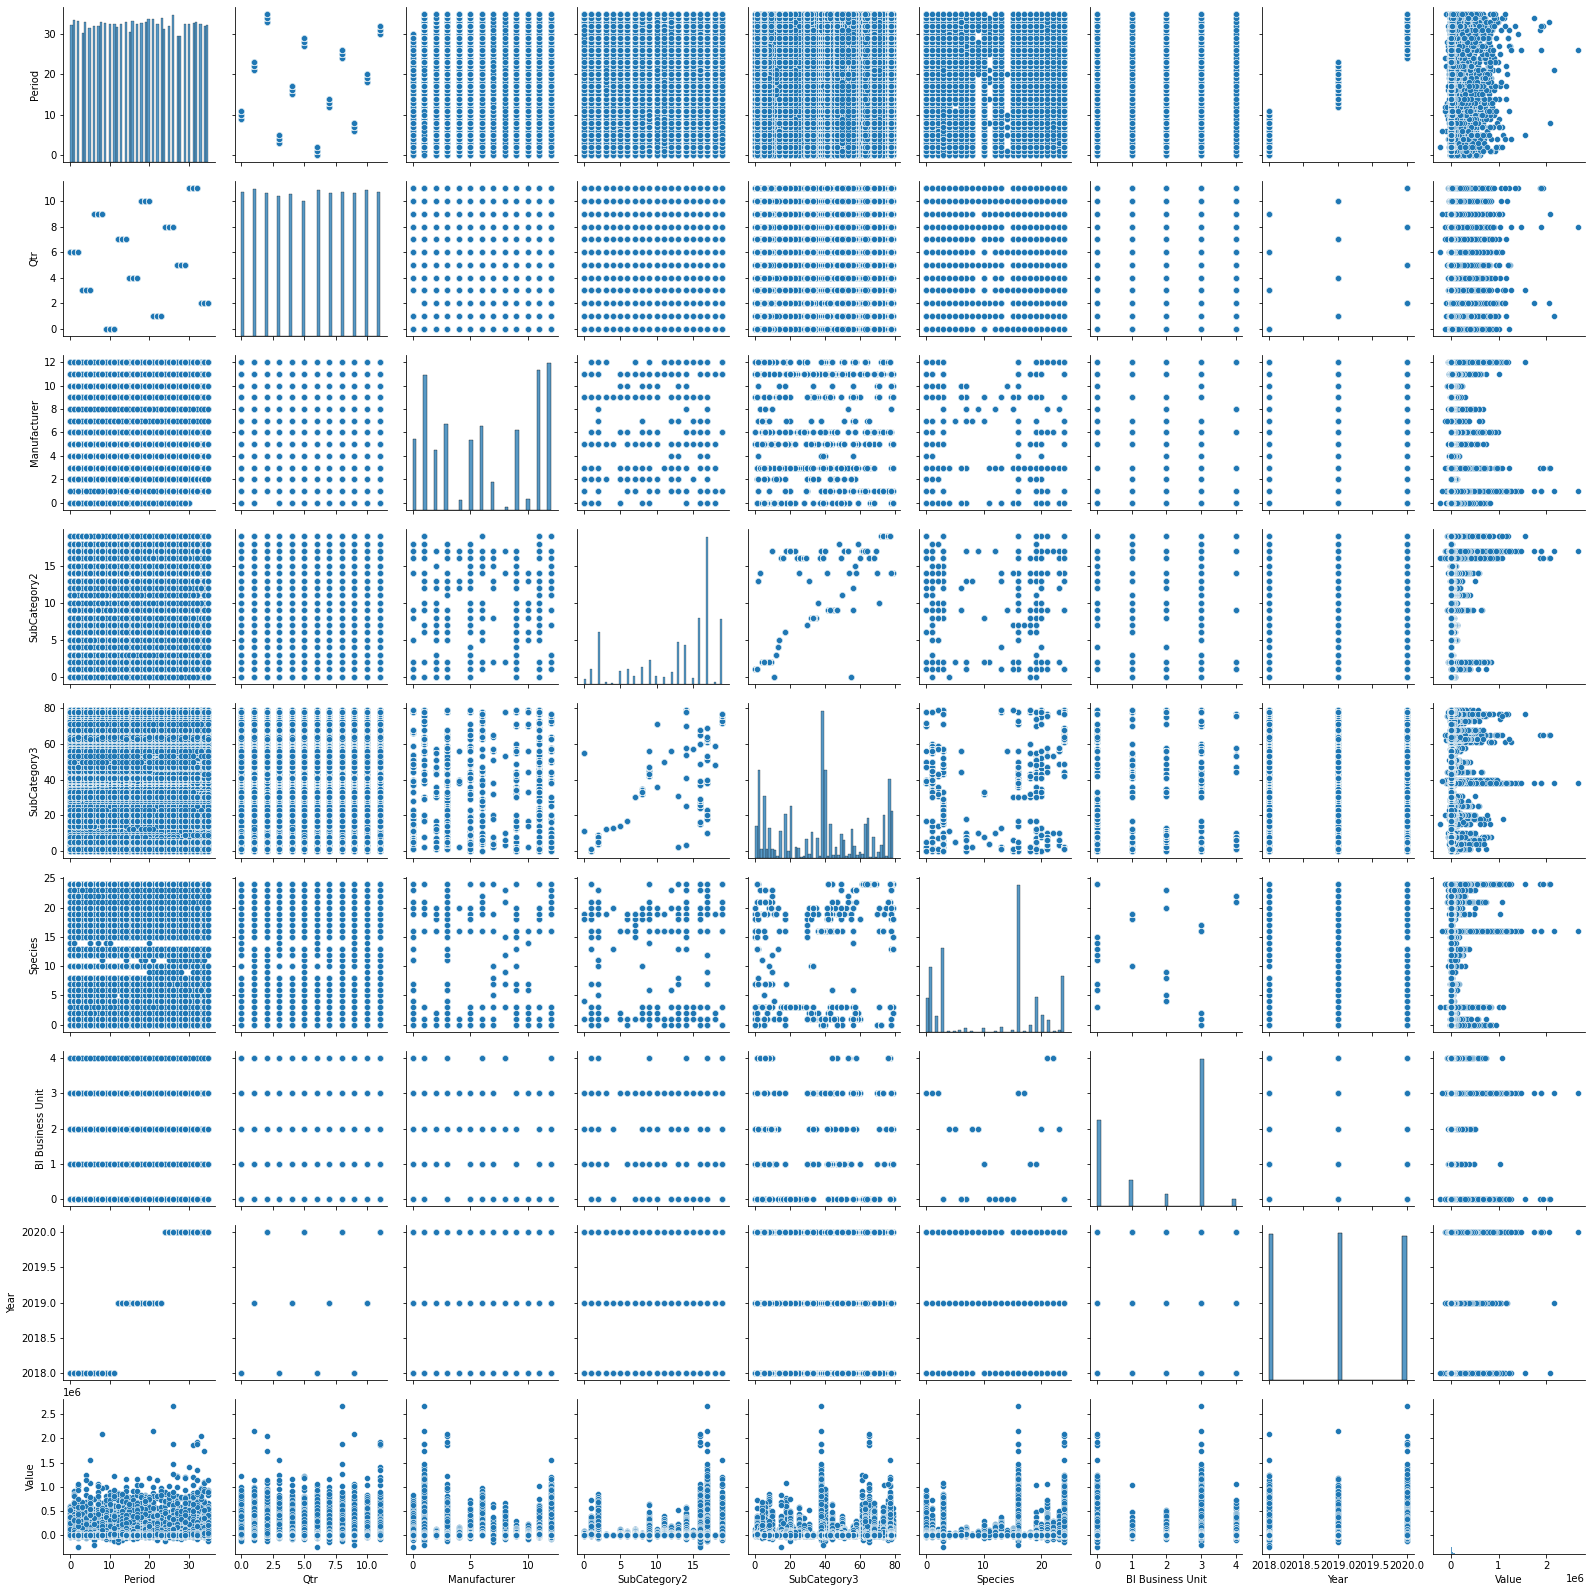

In [23]:
sns.pairplot(market_drop_model)

In [18]:
model = LinearRegression()
X = market_drop_model[['Period', 'Qtr', 'Manufacturer', 'SubCategory2', 'SubCategory3',
       'Species', 'BI Business Unit', 'Year']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)


model.fit(X_train,y_train)
# Obtain MSE and r2 for testing data
y_test_pred = model.predict(X_test)
print("Checking testing values")
print("RMSE: ", mean_squared_error(y_test,y_test_pred,squared=False))
print("MAE:" , mean_absolute_error(y_test, y_test_pred))
print("R2:" , r2_score(y_test, y_test_pred))

Checking testing values
RMSE:  52797.31913489867
MAE: 20413.367034649193
R2: 0.0142817936330214


Now we are individually testing the linear regression with the individual variables to see which variables are the best predictors.

In [25]:
X = market_drop_model[['Period']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)
model = LinearRegression()

model.fit(X_train,y_train)
# Obtain MSE and r2 for testing data
y_test_pred = model.predict(X_test)
print("Checking testing values")
print("RMSE: ", mean_squared_error(y_test,y_test_pred,squared=False))
print("MAE:" , mean_absolute_error(y_test, y_test_pred))
print("R2:" , r2_score(y_test, y_test_pred))

Checking testing values
RMSE:  53174.05650488723
MAE: 20852.524178342755
R2: 0.00016434196573988924


In [26]:
X = market_drop_model[['Qtr']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)
model = LinearRegression()

model.fit(X_train,y_train)
# Obtain MSE and r2 for testing data
y_test_pred = model.predict(X_test)
print("Checking testing values")
print("RMSE: ", mean_squared_error(y_test,y_test_pred,squared=False))
print("MAE:" , mean_absolute_error(y_test, y_test_pred))
print("R2:" , r2_score(y_test, y_test_pred))

Checking testing values
RMSE:  53178.79257503653
MAE: 20860.77070222976
R2: -1.3771309994137226e-05


In [27]:
X = market_drop_model[['Manufacturer']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)
model = LinearRegression()

model.fit(X_train,y_train)
# Obtain MSE and r2 for testing data
y_test_pred = model.predict(X_test)
print("Checking testing values")
print("RMSE: ", mean_squared_error(y_test,y_test_pred,squared=False))
print("MAE:" , mean_absolute_error(y_test, y_test_pred))
print("R2:" , r2_score(y_test, y_test_pred))

Checking testing values
RMSE:  53179.98425601378
MAE: 20862.00282761879
R2: -5.8590332122632205e-05


In [28]:
X = market_drop_model[['SubCategory2']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)
model = LinearRegression()

model.fit(X_train,y_train)
# Obtain MSE and r2 for testing data
y_test_pred = model.predict(X_test)
print("Checking testing values")
print("RMSE: ", mean_squared_error(y_test,y_test_pred,squared=False))
print("MAE:" , mean_absolute_error(y_test, y_test_pred))
print("R2:" , r2_score(y_test, y_test_pred))

Checking testing values
RMSE:  52822.199568428616
MAE: 20442.45687686711
R2: 0.013352546642070418


In [29]:
X = market_drop_model[['SubCategory3']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)
model = LinearRegression()

model.fit(X_train,y_train)
# Obtain MSE and r2 for testing data
y_test_pred = model.predict(X_test)
print("Checking testing values")
print("RMSE: ", mean_squared_error(y_test,y_test_pred,squared=False))
print("MAE:" , mean_absolute_error(y_test, y_test_pred))
print("R2:" , r2_score(y_test, y_test_pred))

Checking testing values
RMSE:  52971.65320424556
MAE: 20579.917820666527
R2: 0.007761463453755835


In [30]:
X = market_drop_model[['Species']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)
model = LinearRegression()

model.fit(X_train,y_train)
# Obtain MSE and r2 for testing data
y_test_pred = model.predict(X_test)
print("Checking testing values")
print("RMSE: ", mean_squared_error(y_test,y_test_pred,squared=False))
print("MAE:" , mean_absolute_error(y_test, y_test_pred))
print("R2:" , r2_score(y_test, y_test_pred))

Checking testing values
RMSE:  53124.07403309945
MAE: 20809.483114838727
R2: 0.002043106667499628


In [31]:
X = market_drop_model[['BI Business Unit']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)
model = LinearRegression()

model.fit(X_train,y_train)
# Obtain MSE and r2 for testing data
y_test_pred = model.predict(X_test)
print("Checking testing values")
print("RMSE: ", mean_squared_error(y_test,y_test_pred,squared=False))
print("MAE:" , mean_absolute_error(y_test, y_test_pred))
print("R2:" , r2_score(y_test, y_test_pred))

Checking testing values
RMSE:  53150.28907518666
MAE: 20818.408658782017
R2: 0.0010579436367595951


In [32]:
X = market_drop_model[['Year']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)
model = LinearRegression()

model.fit(X_train,y_train)
# Obtain MSE and r2 for testing data
y_test_pred = model.predict(X_test)
print("Checking testing values")
print("RMSE: ", mean_squared_error(y_test,y_test_pred,squared=False))
print("MAE:" , mean_absolute_error(y_test, y_test_pred))
print("R2:" , r2_score(y_test, y_test_pred))

Checking testing values
RMSE:  53174.335096922405
MAE: 20853.08934830393
R2: 0.00015386516563076214


## KNN
The linear regression can be our baseline model and now we will try the KNN model to see if there is a difference and carry on the same procedure.

In [33]:
X = market_drop_model[['Period', 'Qtr', 'Manufacturer', 'SubCategory2', 'SubCategory3',
       'Species', 'BI Business Unit', 'Year']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)

from sklearn.neighbors import KNeighborsClassifier
K_Neighbour = KNeighborsClassifier(n_neighbors=1)

K_Neighbour.fit(X_train,y_train)
y_train_pred = K_Neighbour.predict(X_train)
y_test_pred = K_Neighbour.predict(X_test)
#print('The accuracy of the training with all the variables KNearestNeighbour model is : ', accuracy_score(y_train, y_trainpred))
#print('The accuracy of the testing with all the variables KNearestNeighbour model is : ', accuracy_score(y_test, y_testpred))

print("Checking testing values")
print("RMSE: ", mean_squared_error(y_test,y_test_pred,squared=False))
print("MAE:" , mean_absolute_error(y_test, y_test_pred))
print("R2:" , r2_score(y_test, y_test_pred))

Checking testing values
RMSE:  10116.361706840718
MAE: 22539.089644260832
R2: 0.9638109040633203


In [34]:
#X = market_drop_model[['Period', 'Qtr', 'Manufacturer', 'SubCategory2', 'SubCategory3','Species', 'BI Business Unit', 'Year']]
X = market_drop_model[['Period']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)


K_Neighbour = KNeighborsClassifier(n_neighbors=1)
K_Neighbour.fit(X_train,y_train)
y_train_pred = K_Neighbour.predict(X_train)
y_test_pred = K_Neighbour.predict(X_test)
print("Checking testing values")
print("RMSE: ", mean_squared_error(y_test,y_test_pred,squared=False))
print("MAE:" , mean_absolute_error(y_test, y_test_pred))
print("R2:" , r2_score(y_test, y_test_pred))

Checking testing values
RMSE:  10251.87296914955
MAE: 33219.22047540716
R2: 0.9628348860864643


In [59]:
#X = market_drop_model[['Period', 'Qtr', 'Manufacturer', 'SubCategory2', 'SubCategory3','Species', 'BI Business Unit', 'Year']]
X = market_drop_model[['Qtr']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)


K_Neighbour = KNeighborsClassifier(n_neighbors=1)
K_Neighbour.fit(X_train,y_train)
y_train_pred = K_Neighbour.predict(X_train)
y_test_pred = K_Neighbour.predict(X_test)
print("Checking testing values")
print("RMSE: ", mean_squared_error(y_test,y_test_pred,squared=False))
print("MAE:" , mean_absolute_error(y_test, y_test_pred))
print("R2:" , r2_score(y_test, y_test_pred))

Checking testing values
RMSE:  10250.513848250856
MAE: 23190.516355462914
R2: 0.9628447396098


In [60]:
#X = market_drop_model[['Period', 'Qtr', 'Manufacturer', 'SubCategory2', 'SubCategory3','Species', 'BI Business Unit', 'Year']]
X = market_drop_model[['Manufacturer']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)


K_Neighbour = KNeighborsClassifier(n_neighbors=1)
K_Neighbour.fit(X_train,y_train)
y_train_pred = K_Neighbour.predict(X_train)
y_test_pred = K_Neighbour.predict(X_test)
print("Checking testing values")
print("RMSE: ", mean_squared_error(y_test,y_test_pred,squared=False))
print("MAE:" , mean_absolute_error(y_test, y_test_pred))
print("R2:" , r2_score(y_test, y_test_pred))

Checking testing values
RMSE:  9217.290489529392
MAE: 16878.68645227721
R2: 0.9699575335057995


In [61]:
#X = market_drop_model[['Period', 'Qtr', 'Manufacturer', 'SubCategory2', 'SubCategory3','Species', 'BI Business Unit', 'Year']]
X = market_drop_model[['SubCategory2']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)


K_Neighbour = KNeighborsClassifier(n_neighbors=1)
K_Neighbour.fit(X_train,y_train)
y_train_pred = K_Neighbour.predict(X_train)
y_test_pred = K_Neighbour.predict(X_test)
print("Checking testing values")
print("RMSE: ", mean_squared_error(y_test,y_test_pred,squared=False))
print("MAE:" , mean_absolute_error(y_test, y_test_pred))
print("R2:" , r2_score(y_test, y_test_pred))

Checking testing values
RMSE:  9767.64196844382
MAE: 20735.807715006842
R2: 0.9662628415916469


In [62]:
#X = market_drop_model[['Period', 'Qtr', 'Manufacturer', 'SubCategory2', 'SubCategory3','Species', 'BI Business Unit', 'Year']]
X = market_drop_model[['SubCategory3']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)


K_Neighbour = KNeighborsClassifier(n_neighbors=1)
K_Neighbour.fit(X_train,y_train)
y_train_pred = K_Neighbour.predict(X_train)
y_test_pred = K_Neighbour.predict(X_test)
print("Checking testing values")
print("RMSE: ", mean_squared_error(y_test,y_test_pred,squared=False))
print("MAE:" , mean_absolute_error(y_test, y_test_pred))
print("R2:" , r2_score(y_test, y_test_pred))

Checking testing values
RMSE:  8727.098683060329
MAE: 18376.209161570627
R2: 0.9730679873636048


In [63]:
#X = market_drop_model[['Period', 'Qtr', 'Manufacturer', 'SubCategory2', 'SubCategory3','Species', 'BI Business Unit', 'Year']]
X = market_drop_model[['Species']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)


K_Neighbour = KNeighborsClassifier(n_neighbors=1)
K_Neighbour.fit(X_train,y_train)
y_train_pred = K_Neighbour.predict(X_train)
y_test_pred = K_Neighbour.predict(X_test)
print("Checking testing values")
print("RMSE: ", mean_squared_error(y_test,y_test_pred,squared=False))
print("MAE:" , mean_absolute_error(y_test, y_test_pred))
print("R2:" , r2_score(y_test, y_test_pred))

Checking testing values
RMSE:  16349.088709223139
MAE: 21045.795183143513
R2: 0.9054816489386929


In [64]:
#X = market_drop_model[['Period', 'Qtr', 'Manufacturer', 'SubCategory2', 'SubCategory3','Species', 'BI Business Unit', 'Year']]
X = market_drop_model[['BI Business Unit']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)


K_Neighbour = KNeighborsClassifier(n_neighbors=1)
K_Neighbour.fit(X_train,y_train)
y_train_pred = K_Neighbour.predict(X_train)
y_test_pred = K_Neighbour.predict(X_test)
print("Checking testing values")
print("RMSE: ", mean_squared_error(y_test,y_test_pred,squared=False))
print("MAE:" , mean_absolute_error(y_test, y_test_pred))
print("R2:" , r2_score(y_test, y_test_pred))

Checking testing values
RMSE:  14210.114190005368
MAE: 20636.069214058793
R2: 0.9285957319617795


In [65]:
#X = market_drop_model[['Period', 'Qtr', 'Manufacturer', 'SubCategory2', 'SubCategory3','Species', 'BI Business Unit', 'Year']]
X = market_drop_model[['Year']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)


K_Neighbour = KNeighborsClassifier(n_neighbors=1)
K_Neighbour.fit(X_train,y_train)
y_train_pred = K_Neighbour.predict(X_train)
y_test_pred = K_Neighbour.predict(X_test)
print("Checking testing values")
print("RMSE: ", mean_squared_error(y_test,y_test_pred,squared=False))
print("MAE:" , mean_absolute_error(y_test, y_test_pred))
print("R2:" , r2_score(y_test, y_test_pred))

Checking testing values
RMSE:  nan
MAE: 71161.1908283838
R2: 1.1607976475026427


# ARIMA

Using Pets data only in order to maintain the integrity of the model since we want to see the time trends and pets is the highest grossing value creation

In [113]:
market_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199091 entries, 0 to 199398
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Period            199091 non-null  datetime64[ns]
 1   Qtr               199091 non-null  object        
 2   Manufacturer      199091 non-null  object        
 3   SubCategory2      199091 non-null  object        
 4   SubCategory3      199091 non-null  object        
 5   Species           199091 non-null  object        
 6   Value             199091 non-null  float64       
 7   YEAR              199091 non-null  int64         
 8   BI Business Unit  199091 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 15.2+ MB


In [114]:
market_drop['Period'] = pd.to_datetime(market_drop['Period'])
market_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199091 entries, 0 to 199398
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Period            199091 non-null  datetime64[ns]
 1   Qtr               199091 non-null  object        
 2   Manufacturer      199091 non-null  object        
 3   SubCategory2      199091 non-null  object        
 4   SubCategory3      199091 non-null  object        
 5   Species           199091 non-null  object        
 6   Value             199091 non-null  float64       
 7   YEAR              199091 non-null  int64         
 8   BI Business Unit  199091 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 15.2+ MB


In [121]:
market_drop_pets = market_drop[market_drop['BI Business Unit'] == 'Pets']
market_time_series_model = pd.DataFrame({'Period':market_drop_pets['Period'],'Value':market_drop_pets['Value'].astype(int)})
market_time_series_model=market_time_series_model.set_index('Period')

In [122]:
market_time_series_model.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105359 entries, 2020-10-01 to 2018-03-01
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Value   105359 non-null  int32
dtypes: int32(1)
memory usage: 1.2 MB


In [123]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              seasonal=False,
                              trace=True)
    return automodel

In [124]:
def plotarima(n_periods, timeseries, automodel):
    # Forecast
    fc, confint = automodel.predict(n_periods=n_periods, 
                                    return_conf_int=True)
    # Weekly index
    fc_ind = pd.date_range(timeseries.index[timeseries.shape[0]-1], 
                           periods=n_periods, freq="W")
    # Forecast series
    fc_series = pd.Series(fc, index=fc_ind)
    # Upper and lower confidence bounds
    lower_series = pd.Series(confint[:, 0], index=fc_ind)
    upper_series = pd.Series(confint[:, 1], index=fc_ind)
    # Create plot
    plt.figure(figsize=(10, 6))
    plt.plot(timeseries)
    plt.plot(fc_series, color="red")
    plt.xlabel("date")
    plt.ylabel(timeseries.name)
    plt.fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color="k", 
                     alpha=0.25)
    plt.legend(("past", "forecast", "95% confidence interval"),  
               loc="upper left")
    plt.show()

# DTR

In [127]:
X = market_drop_model[['Period', 'Qtr', 'Manufacturer', 'SubCategory2', 'SubCategory3',
       'Species', 'BI Business Unit', 'Year']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)

regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

print("Checking testing values")
print("RMSE: ", mean_squared_error(y_test,y_test_pred,squared=False))
print("MAE:" , mean_absolute_error(y_test, y_test_pred))
print("R2:" , r2_score(y_test, y_test_pred))

Checking testing values
RMSE:  50798.51933128566
MAE: 18281.694122644476
R2: 0.08750363458171517


# PREDICTIONS

From the inputs, re-encode a new data set and run the prediction

Below are the "arr" listed to compare them to the actual parameter to be used

le.fit(Period_Unique)
arr1 = le.transform(Period)

le.fit(Qtr_Unique)
arr2 = le.transform(Qtr)

le.fit(Manufacturer_Unique)
arr3 = le.transform(Manufacturer)

le.fit(SubCategory2_Unique)
arr4 = le.transform(SubCategory2)

le.fit(SubCategory3_Unique)
arr5 = le.transform(SubCategory3)

le.fit(Species_Unique)
arr6 = le.transform(Species)

le.fit(BI_Business_Unit_Unique)
arr7 = le.transform(BI_Business_Unit)

In [35]:
Qtr_Unique

array(['Mar-18', 'Jun-18', 'Sep-18', 'Dec-18', 'Mar-19', 'Jun-19',
       'Sep-19', 'Dec-19', 'Mar-20', 'Jun-20', 'Sep-20', 'Dec-20'],
      dtype=object)

In [43]:
market_drop_model

,Period,Qtr,Manufacturer,SubCategory2,SubCategory3,Species,BI Business Unit,Year,Value
0,33,2,3,16,27,3,0,2020,103385
1,33,2,3,16,27,3,0,2020,95091
2,34,2,3,16,27,3,0,2020,29946
3,34,2,3,16,27,3,0,2020,200
4,34,2,3,16,27,3,0,2020,32790
...,...,...,...,...,...,...,...,...,...
199394,2,6,10,14,78,1,3,2018,3273
199395,2,6,10,14,78,1,3,2018,1435
199396,2,6,10,14,78,1,3,2018,3130
199397,2,6,10,14,78,1,3,2018,1341


In [44]:
market_drop

,Period,Qtr,Manufacturer,SubCategory2,SubCategory3,Species,Value,YEAR,BI Business Unit
0,2020-10,Dec-20,Elanco,Parasites - External,Cattle Tick & Worm Pour-On,Cattle,103385.00,2020,Cattle & Sheep
1,2020-10,Dec-20,Elanco,Parasites - External,Cattle Tick & Worm Pour-On,Cattle,95091.00,2020,Cattle & Sheep
2,2020-11,Dec-20,Elanco,Parasites - External,Cattle Tick & Worm Pour-On,Cattle,29946.00,2020,Cattle & Sheep
3,2020-11,Dec-20,Elanco,Parasites - External,Cattle Tick & Worm Pour-On,Cattle,200.00,2020,Cattle & Sheep
4,2020-11,Dec-20,Elanco,Parasites - External,Cattle Tick & Worm Pour-On,Cattle,32790.00,2020,Cattle & Sheep
...,...,...,...,...,...,...,...,...,...
199394,2018-03,Mar-18,Vetoquinol,Nutrition & Metabolism,Vitamin & Mineral - Oral,Cat & Dog,3273.14,2018,Pets
199395,2018-03,Mar-18,Vetoquinol,Nutrition & Metabolism,Vitamin & Mineral - Oral,Cat & Dog,1435.84,2018,Pets
199396,2018-03,Mar-18,Vetoquinol,Nutrition & Metabolism,Vitamin & Mineral - Oral,Cat & Dog,3130.32,2018,Pets
199397,2018-03,Mar-18,Vetoquinol,Nutrition & Metabolism,Vitamin & Mineral - Oral,Cat & Dog,1341.17,2018,Pets


In [37]:
BI_Business_Unit_Unique

array(['Cattle & Sheep', 'Pets', 'No Bus', 'Equine', 'Swine'],
      dtype=object)

In [38]:
Manufacturer_Unique

array(['Elanco', 'Troy', 'Dechra', 'MSD AH', 'Bayer', 'Norbrook',
       'Virbac', 'Jurox', 'Vetoquinol', 'Phibro', 'Zoetis',
       'Boehringer Ingelheim', 'Exelpet'], dtype=object)

Create Prediction parameters

In [39]:
X = market_drop_model[['Qtr','Manufacturer']]
y = market_drop_model[['Value']]
X_train, X_test = train_test_split(X, test_size=0.4, random_state=7)
y_train, y_test = train_test_split(y, test_size=0.4, random_state=7)

from sklearn.neighbors import KNeighborsClassifier
K_Neighbour = KNeighborsClassifier(n_neighbors=1)

K_Neighbour.fit(X_train,y_train)
y_train_pred = K_Neighbour.predict(X_train)
y_test_pred = K_Neighbour.predict(X_test)
#print('The accuracy of the training with all the variables KNearestNeighbour model is : ', accuracy_score(y_train, y_trainpred))
#print('The accuracy of the testing with all the variables KNearestNeighbour model is : ', accuracy_score(y_test, y_testpred))

print("Checking testing values")
print("RMSE: ", mean_squared_error(y_test,y_test_pred,squared=False))
print("MAE:" , mean_absolute_error(y_test, y_test_pred))
print("R2:" , r2_score(y_test, y_test_pred))

Checking testing values
RMSE:  9835.652146047632
MAE: 23647.5076283637
R2: 0.9657913955424002


In order to select the parameters for the testing, you need to first find the encoding as done above and then choose the parameters you want in the array

In [40]:
X_new = np.array([[12,2]])

In [41]:
prediction = K_Neighbour.predict(X_new)
print("prediction: ", prediction)

prediction:  [178]
